<a href="https://colab.research.google.com/github/ran2710p/Uber-Data-Analysis-Pyhton-/blob/main/UberDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [ ]:
data=pd.read_csv('/content/UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# New Section

In [ ]:
data.shape

(653, 7)

In [ ]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  653 non-null    datetime64[ns]
 1   END_DATE    653 non-null    datetime64[ns]
 2   CATEGORY    653 non-null    object        
 3   START       653 non-null    object        
 4   STOP        653 non-null    object        
 5   MILES       653 non-null    float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [ ]:
#checking for null values
data.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [ ]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [ ]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['START_DATE']

0      2016-01-01 21:11:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
5      2016-01-06 17:15:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 653, dtype: datetime64[ns]

In [ ]:
data['END_DATE'] = pd.to_datetime(data['END_DATE'])
data['END_DATE']

0      2016-01-01 21:17:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
5      2016-01-06 17:19:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE, Length: 653, dtype: datetime64[ns]

In [ ]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
#replace the incorrect data
data['START'].replace('Kar?chi','Karachi',inplace=True)
data['START']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
5        West Palm Beach
              ...       
1150             Karachi
1151             Karachi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START, Length: 653, dtype: object

In [ ]:
#replace the incorrect data
data['STOP'].replace('Kar?chi','Karachi',inplace=True)
data['STOP']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4        West Palm Beach
5        West Palm Beach
              ...       
1150             Karachi
1151    Unknown Location
1152    Unknown Location
1153             Gampaha
1154           Ilukwatta
Name: STOP, Length: 653, dtype: object

In [ ]:
#replace the incorrect data
data['START'].replace('R?walpindi','Rawalpindi',inplace=True)
data['START']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
5        West Palm Beach
              ...       
1150             Karachi
1151             Karachi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START, Length: 653, dtype: object

In [ ]:
#replace the incorrect data
data['STOP'].replace('R?walpindi','Rawalpindi',inplace=True)
data['STOP']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4        West Palm Beach
5        West Palm Beach
              ...       
1150             Karachi
1151    Unknown Location
1152    Unknown Location
1153             Gampaha
1154           Ilukwatta
Name: STOP, Length: 653, dtype: object

In [ ]:
#yeardata
data['START_DATE'].dt.year

0       2016
2       2016
3       2016
4       2016
5       2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: START_DATE, Length: 653, dtype: int64

In [ ]:
#month
data['START_DATE'].dt.month

0        1
2        1
3        1
4        1
5        1
        ..
1150    12
1151    12
1152    12
1153    12
1154    12
Name: START_DATE, Length: 653, dtype: int64

In [ ]:
#day
data['START_DATE'].dt.day

0        1
2        2
3        5
4        6
5        6
        ..
1150    31
1151    31
1152    31
1153    31
1154    31
Name: START_DATE, Length: 653, dtype: int64

In [ ]:
data['year'] = data['START_DATE'].dt.year
data['month'] = data['START_DATE'].dt.month
data['day'] = data['START_DATE'].dt.day
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,2016,12,31
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,2016,12,31
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016,12,31
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016,12,31


**Exploratory Data Analysis**

<Axes: >

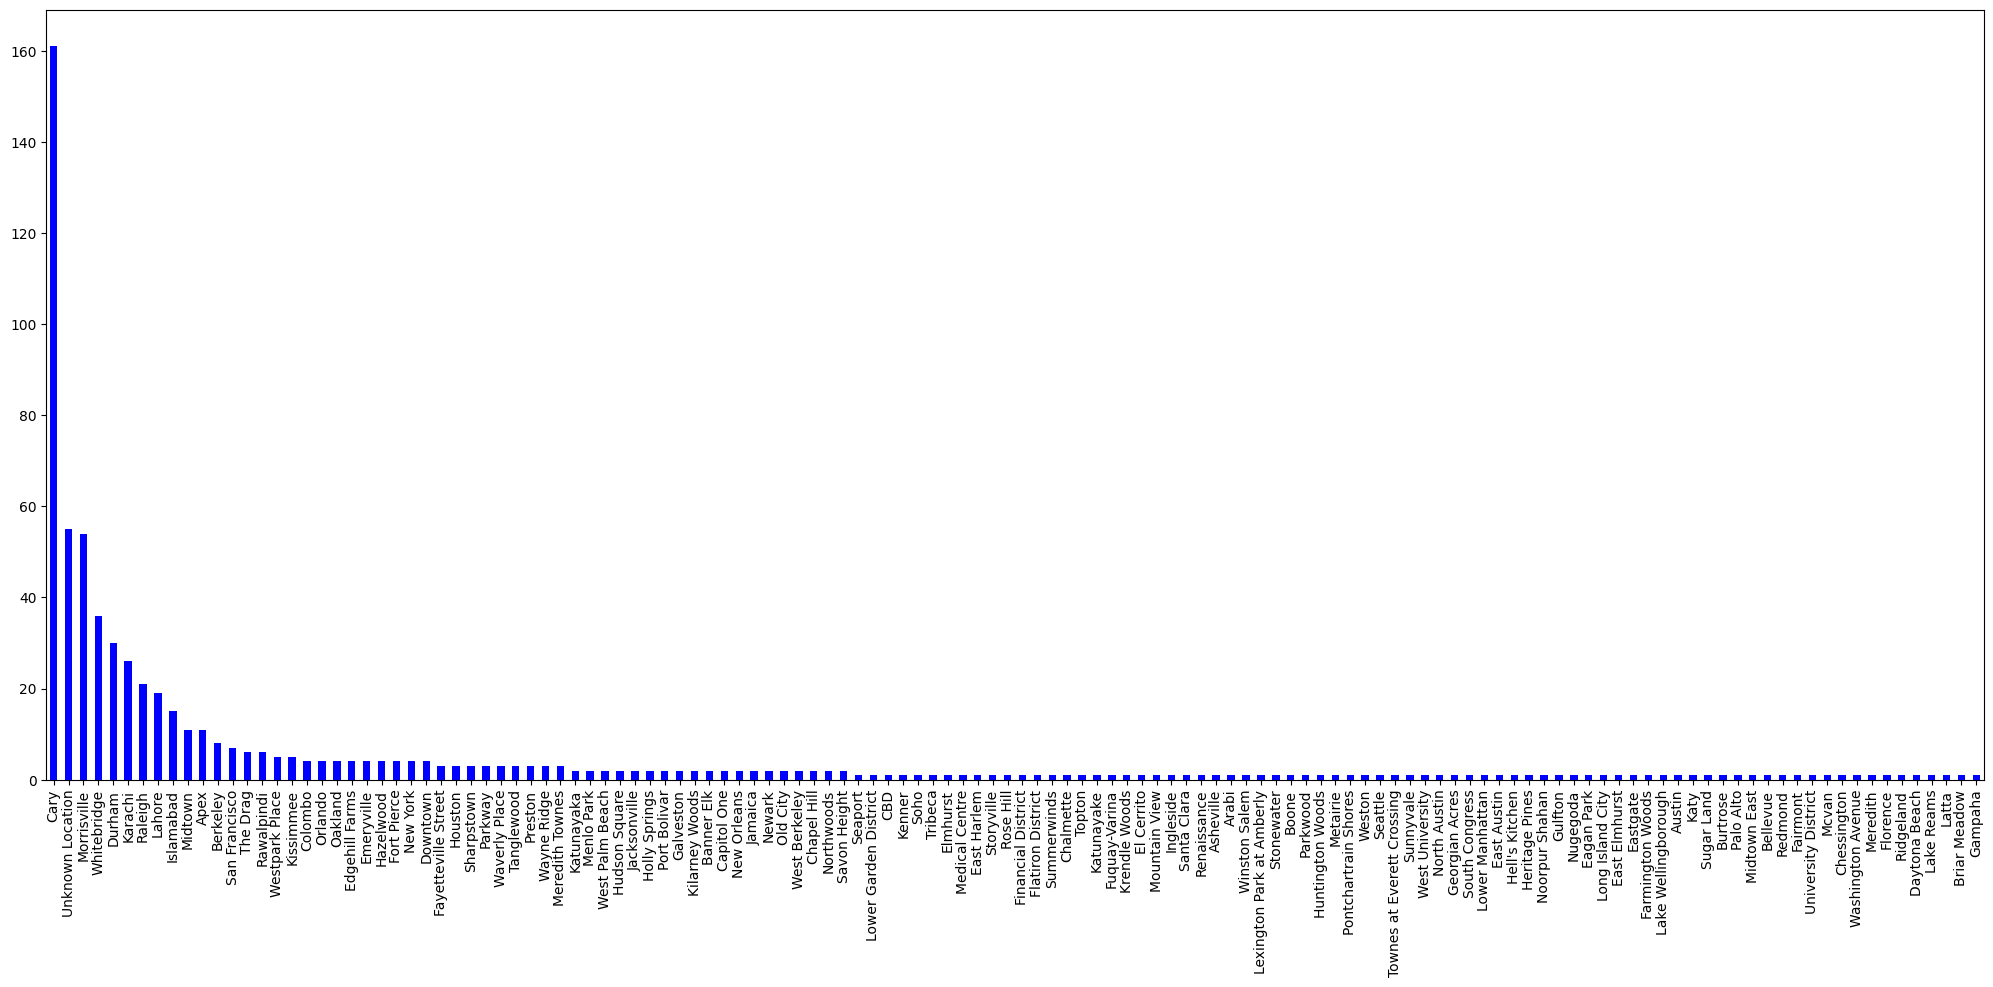

In [ ]:
data['START'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

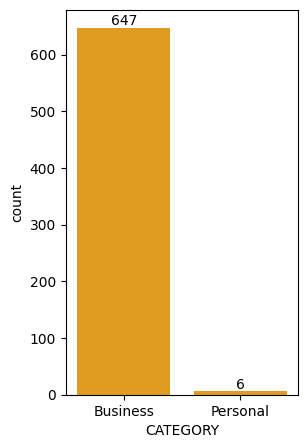

In [ ]:
plt.figure(figsize=(3,5))
da = sns.countplot(x = 'CATEGORY',data = data, color = 'Orange')
for bar in da.containers:
    da.bar_label(bar)

Above graph shows that Most of the Uber rides from Bussiness Category

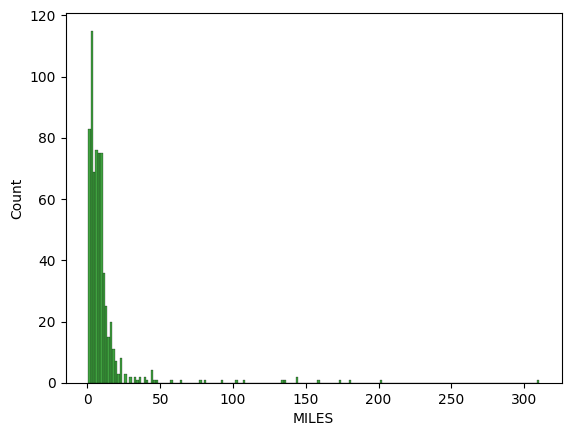

In [ ]:
sns.histplot(data['MILES'],color = 'Green')
plt.show()

1.Above graph shows most rides are in between 0 to 50 miles
2.No rides between 200 to 300 miles

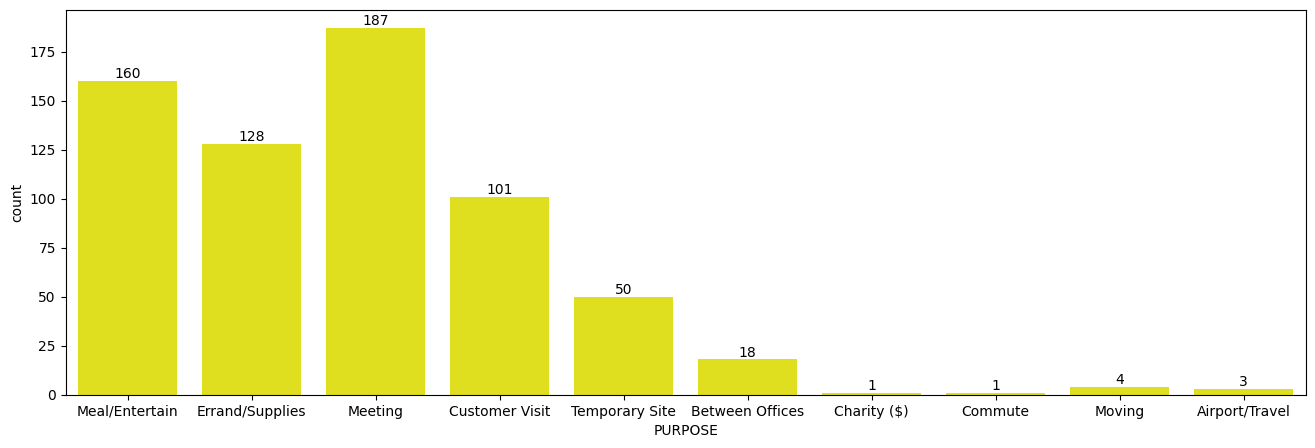

In [ ]:
plt.figure(figsize=(16,5))

ss = sns.countplot(x='PURPOSE' , data = data, color = 'Yellow')

for bar in ss.containers:
    ss.bar_label(bar)

1.From above graph we can see that most rides are for "Meeting" Purpose and 2nd most is "Meal"
2.Least rides are charity and commute

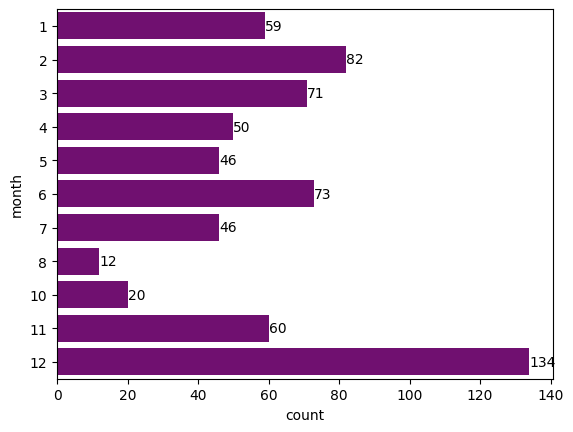

In [ ]:
month = sns.countplot(y= 'month' , data = data,color = 'purple')

for bar in month .containers:
    month.bar_label(bar)

1.From avove graph its clear that most rides from 12th month is 134
2.Least rides in month 8 that is 12

In [18]:
Top_10_riderstart_locations = data['START'].value_counts().head(10)
Top_10_riderstart_locations


Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

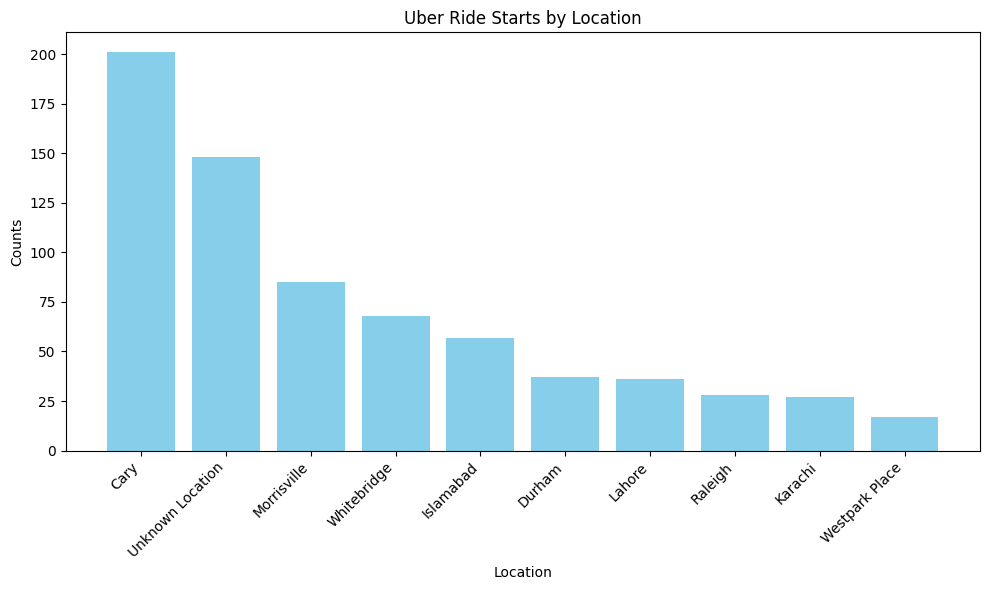

In [22]:
# Your data
data = {
    'Location': ['Cary', 'Unknown Location', 'Morrisville', 'Whitebridge', 'Islamabad', 'Durham', 'Lahore', 'Raleigh', 'Karachi', 'Westpark Place'],
    'Counts': [201, 148, 85, 68, 57, 37, 36, 28, 27, 17]
}

# Create a DataFrame
df = pd.DataFrame(data)

 # Add labels to the bars
for i, count in enumerate(counts):
    start_locations.text(i, count, f'{count}', ha='center', va='bottom')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Location'], df['Counts'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.title('Uber Ride Starts by Location')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()





From above graph it is clear that cary is the location from where most rides start and westpark place least

In [ ]:
Top_10_riderstop_locations = data['STOP'].value_counts().head(10)
Top_10_riderstop_locations

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

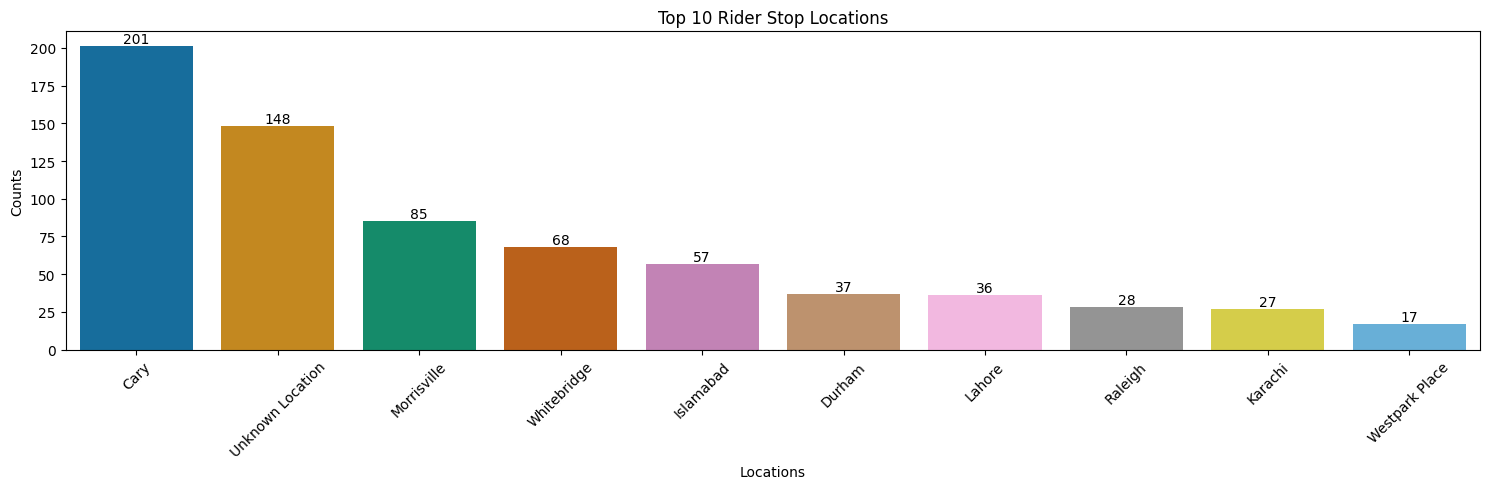

In [16]:
# data
Top_10_riderstop_locations = ['Cary', 'Unknown Location', 'Morrisville', 'Whitebridge', 'Islamabad', 'Durham', 'Lahore', 'Raleigh', 'Karachi', 'Westpark Place']
counts = [201, 148, 85, 68, 57, 37, 36, 28, 27, 17]

plt.figure(figsize=(15, 5))

# Create a bar chart using Seaborn
stop_locations = sns.barplot(x=Top_10_riderstop_locations, y=counts, palette='colorblind')

# Add labels to the bars
for i, count in enumerate(counts):
    stop_locations.text(i, count, f'{count}', ha='center', va='bottom')

plt.xlabel('Locations')
plt.ylabel('Counts')
plt.title('Top 10 Rider Stop Locations')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

From above graoh it is clear that cary is the location where most rides get stops.